In [1]:
import pandas as pd
import pickle

with open('business_graph_threshold.pkl', 'rb') as f:
    G = pickle.load(f)

filtered_business_ids = set(G.nodes)

file_path = 'filtered_reviews_open2018_2019.csv'
filtered_reviews_df = pd.read_csv(file_path)

filtered_reviews_for_graph = filtered_reviews_df[filtered_reviews_df['business_id'].isin(filtered_business_ids)]

In [2]:
filtered_reviews_for_graph.shape[0]

819756

In [3]:
unique_business_ids_count = filtered_reviews_for_graph['business_id'].nunique()
unique_business_ids_count

8512

In [4]:
import pandas as pd

business_mapping = filtered_reviews_for_graph.set_index('business_id')[['name', 'city', 'address']].drop_duplicates().to_dict('index')

degree_dict = dict(G.degree())

top_5_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by degree with business details:")
for node, degree in top_5_by_degree:
    business_info = business_mapping.get(node, {"name": "Unknown", "city": "Unknown", "address": "Unknown"})
    print(f"Node (business_id): {node}, Name: {business_info['name']}, City: {business_info['city']}, Address: {business_info['address']}, Degree: {degree}")

Top 5 nodes by degree with business details:
Node (business_id): PrsvO1rzkgg6qFizlAoEtg, Name: Mike's Pastry, City: Boston, Address: 300 Hanover St, Degree: 44
Node (business_id): 0oGCF9xsvKe1vS6Sm3o3VQ, Name: Kokoro Tokyo Mazesoba, City: Vancouver, Address: 551 Seymour Street, Degree: 40
Node (business_id): YZs1gNSh_sN8JmN_nrpxeA, Name: Terry Black's Barbecue, City: Austin, Address: 1003 Barton Springs Rd, Degree: 36
Node (business_id): z9oCxeqOKp2QMfM24m7bUw, Name: Mary Mac's Tea Room, City: Atlanta, Address: 224 Ponce De Leon Ave NE, Degree: 34
Node (business_id): gjYyUYpTeNMp8zrw4ZDYCw, Name: Bulla Gastrobar, City: Winter Park, Address: 110 S Orlando Ave, Ste 7, Degree: 32


The top 5 nodes by degrees don't offer any particular info at first glance here. They are spread across cities and represent diverse cuisines, such as Mike's Pastry in Boston for pastries, Kokoro Tokyo Mazesoba in Vancouver for Japanese noodles, and Terry Black's Barbecue in Austin for barbecue. Alongside Mary Mac's Tea Room in Atlanta and Bulla Gastrobar in Winter Park, their centrality reflects their unique appeal or local significance, suggesting influence in this network arises from varied cultural and regional factors.

In [5]:
graph_nodes = list(G.nodes())

filtered_df = filtered_reviews_for_graph[filtered_reviews_for_graph['business_id'].isin(graph_nodes)]

filtered_df = filtered_df.drop_duplicates(subset='business_id')

city_counts = filtered_df['city'].value_counts()

top_5_cities = city_counts.head(5)

print("Top 5 cities in the graph and their counts:")
print(top_5_cities)

Top 5 cities in the graph and their counts:
city
Vancouver    1019
Portland      899
Austin        844
Orlando       806
Atlanta       764
Name: count, dtype: int64


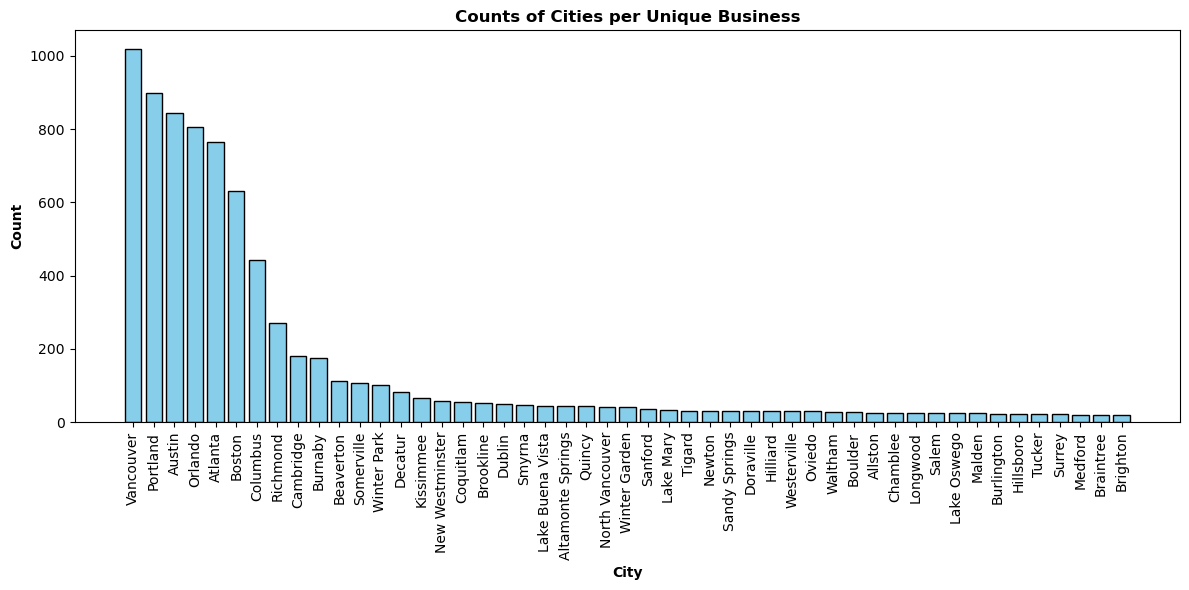

In [6]:
import matplotlib.pyplot as plt

unique_businesses = filtered_reviews_for_graph.drop_duplicates(subset='business_id')

city_counts = unique_businesses['city'].value_counts()

filtered_city_counts = city_counts[city_counts >= 20]

plt.figure(figsize=(12, 6))
plt.bar(
    filtered_city_counts.index, 
    filtered_city_counts.values, 
    color='skyblue',
    edgecolor='black'
)
plt.title('Counts of Cities per Unique Business', fontweight='bold')
plt.xlabel('City', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart shows the distribution of unique businesses across various cities, highlighting a clear dominance by a few major urban areas. Vancouver leads with the highest number of unique businesses, followed closely by Portland and Austin, all exceeding 900 businesses. These cities appear to be central hubs in the dataset, likely reflecting their vibrant economies, active tourism, or a stronger representation within the data collection process. After these leading cities, the counts gradually decrease, with cities like Orlando, Atlanta, and Boston contributing significantly but at a lower level. As we move further along the chart, there is a steep drop in the number of unique businesses, with many cities on the right-hand side having fewer than 100 businesses represented. This long-tail distribution suggests that the dataset includes a mix of major metropolitan areas and smaller cities, capturing a broad but uneven geographic spread. The stark difference between the top cities and those at the tail may reflect varying levels of economic activity, city size, or biases in data collection, making it clear that certain locations play a more prominent role in shaping the dataset.

In [7]:
average_stars = filtered_reviews_for_graph['customer_stars'].mean()

print(f"Average stars rating: {average_stars:.2f}")

Average stars rating: 3.95


In [36]:
business_stats = filtered_reviews_for_graph.groupby('business_id').agg(
    customer_stars=('customer_stars', 'mean'),
    review_count=('customer_stars', 'count')
).reset_index()

merged_data = pd.merge(
    business_stats,
    filtered_reviews_for_graph[['business_id', 'name', 'city', 'address']].drop_duplicates(),
    on='business_id'
)

filtered_data = merged_data[merged_data['review_count'] >= 10]

top_5_rated_businesses = filtered_data.sort_values(by='customer_stars', ascending=False).head(5)

top_5_rated_businesses = top_5_rated_businesses[['business_id', 'name', 'city', 'address', 'customer_stars', 'review_count']]

print("Top 5 most rated businesses (by average stars with at least 10 reviews):")
print(top_5_rated_businesses)

Top 5 most rated businesses (by average stars with at least 10 reviews):
                 business_id                         name               city  \
758   4Zx4dmZPQ6xjGAbDkhSKwQ  Norma's Plant Based Cuisine  Altamonte Springs   
5559  dZEUL3D32Ny6qQQqbFT0kQ    Sahel Market & Restaurant          Vancouver   
1965  DOmaxLcwoKfNLNGkCciOHQ      Nana's Guilty Pleasures           Portland   
2831  JsEwlEUZvxAmbffj-mpZHg              The Fried Onion           Portland   
670   41W2XwM6pnDR92Yw9v2QxQ    Mumbo Gumbo PDX -Sellwood           Portland   

                           address  customer_stars  review_count  
758             351 S State Rd 434        5.000000            60  
5559           3207 West  Broadway        5.000000            13  
1965         6108 SE Milwaukie Ave        4.980769            52  
2831                SE 3rd & Alder        4.964286            28  
670   6200 SE Milwaukie Ave, Ste C        4.954545            88  


In [37]:
business_stats = filtered_reviews_for_graph.groupby('business_id').agg(
    customer_stars=('customer_stars', 'mean'),
    review_count=('customer_stars', 'count')
).reset_index()

merged_data = pd.merge(
    business_stats,
    filtered_reviews_for_graph[['business_id', 'name', 'city', 'address']].drop_duplicates(),
    on='business_id'
)

filtered_data = merged_data[merged_data['review_count'] >= 10]

lowest_5_rated_businesses = filtered_data.sort_values(by='customer_stars', ascending=True).head(5)

lowest_5_rated_businesses = lowest_5_rated_businesses[['business_id', 'name', 'city', 'address', 'customer_stars', 'review_count']]

print("Lowest 5 rated businesses (by average stars with at least 10 reviews):")
print(lowest_5_rated_businesses)

Lowest 5 rated businesses (by average stars with at least 10 reviews):
                 business_id                       name          city  \
413   252DlOgnPandEneK1vykGA  Popeyes Louisiana Kitchen      Clermont   
6087  hZyx9RFuOdXu-wjjJmQfyA                Taco Cabana  Pflugerville   
982   6Id8x6nKtsRjFBfdxj2DdA                 McDonald's     Pataskala   
5816  fY7a3RrarPUeFHwipQa2VA                    Dunkin'      Longwood   
4914  ZwDj2eHZX8zkLoPM8HGfZg                 McDonald's       Orlando   

                   address  customer_stars  review_count  
413            16530 Sr 50        1.303030            33  
6087         15002 Fm 1825        1.333333            69  
982    103 Etna Crest Blvd        1.400000            10  
5816  801 W State Road 434        1.416667            12  
4914         1028 W Lee Rd        1.428571            28  


The results reveal clear contrasts between the top-rated and lowest-rated businesses, shedding light on customer satisfaction and behavior within the dataset. The top 5 businesses by average stars, all achieving nearly perfect ratings, represent a mix of unique and niche dining experiences, emphasizing quality and customer satisfaction. Norma's Plant Based Cuisine in Altamonte Springs stands out with a perfect 5.0 rating across 60 reviews, highlighting its appeal to customers seeking plant-based options. Similarly, Sahel Market & Restaurant in Vancouver, with 13 reviews, and Nana's Guilty Pleasures in Portland, with 52 reviews, cater to more localized or specialized audiences. The high ratings, coupled with their moderate review counts, suggest these businesses excel in providing consistent, high-quality experiences, likely resonating with a loyal customer base. Portland’s notable presence in this list, with three businesses, hints at the city’s vibrant and diverse food culture contributing to customer satisfaction.

In contrast, the lowest-rated businesses are dominated by large chains or high-traffic establishments like Popeyes, McDonald's, Dunkin’, and Taco Cabana. Their average ratings, ranging from 1.30 to 1.42, reflect significant dissatisfaction among customers. Unlike the top-rated businesses, these establishments have higher review counts, such as Taco Cabana’s 69 reviews and Popeyes’ 33 reviews. This suggests that these businesses attract a larger and more diverse customer base, which may lead to greater scrutiny and more polarized reviews. Common issues such as inconsistent service, long wait times, or unmet expectations often plague chain restaurants and may contribute to their low ratings. The presence of multiple McDonald’s locations on this list underscores how global chains face challenges in maintaining uniform quality across different sites.

Overall, the top-rated businesses exemplify the power of specialization and a focus on quality to garner customer loyalty and satisfaction, while the lowest-rated businesses illustrate the difficulties faced by high-volume, high-visibility chains in meeting diverse customer expectations consistently. This comparison highlights the significant role of customer expectations and the nature of the business in shaping review behaviors and satisfaction levels.

In [10]:
filtered_reviews_for_graph = filtered_reviews_for_graph.dropna(subset=['categories'])

all_categories = filtered_reviews_for_graph['categories'].str.split(',').explode()

all_categories = all_categories.str.strip()

unique_cuisines = all_categories.unique()

#print("Unique cuisines/categories:")
#print(unique_cuisines)

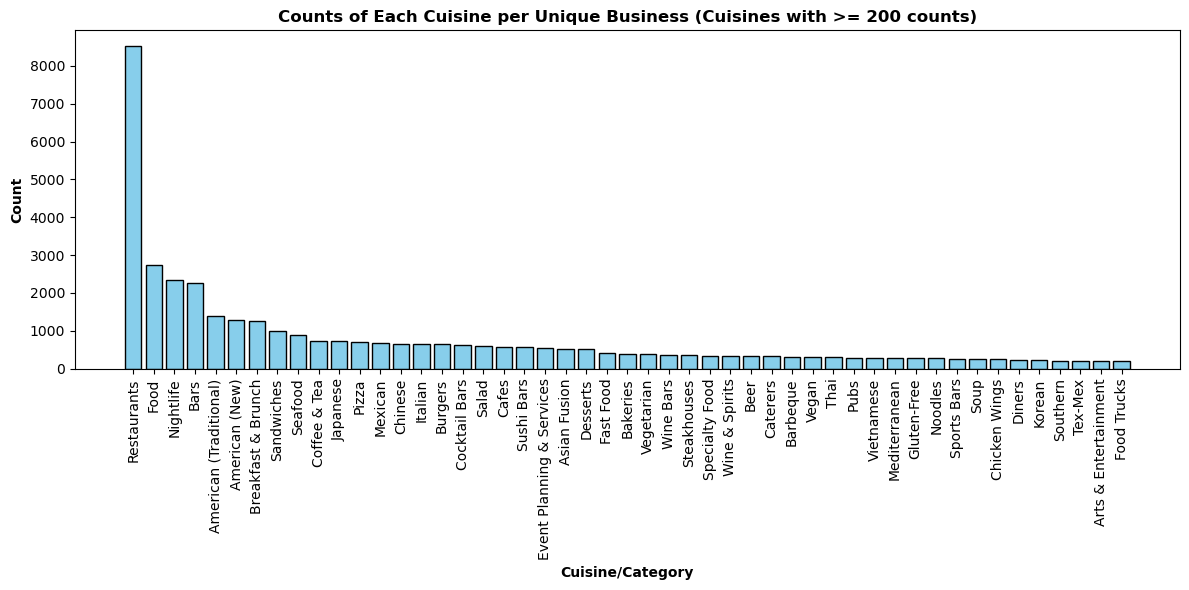

In [11]:
import matplotlib.pyplot as plt

unique_businesses = filtered_reviews_for_graph.drop_duplicates(subset='business_id')
all_categories = unique_businesses['categories'].str.split(',').explode()
all_categories = all_categories.str.strip()
cuisine_counts = all_categories.value_counts()
filtered_cuisine_counts = cuisine_counts[cuisine_counts >= 200]

plt.figure(figsize=(12, 6))
plt.bar(
    filtered_cuisine_counts.index, 
    filtered_cuisine_counts.values, 
    color='skyblue',
    edgecolor='black'
)
plt.title('Counts of Each Cuisine per Unique Business (Cuisines with >= 200 counts)', fontweight='bold')
plt.xlabel('Cuisine/Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This bar chart highlights the distribution of cuisines or categories across unique businesses with at least 200 counts, and it reveals some clear outliers in the data. The most significant observation is the massive spike for categories labeled as "Restaurants" and "Food." These are exceptionally broad and generic labels, likely encompassing a wide variety of actual cuisines, which explains their disproportionately high counts compared to other categories. Such broad terms are not specific cuisines, and their inclusion skews the distribution heavily.

Similarly, we notice other non-cuisine categories like "Nightlife," which raises questions about its relevance in a dataset that is seemingly focused on dining or food establishments. "Nightlife" might refer to bars, lounges, or clubs, but it certainly doesn’t belong alongside specific cuisines like "Japanese," "Mexican," or "Italian." This lack of specificity in some categories dilutes the meaningfulness of the dataset and creates inconsistencies in the analysis.

Beyond these outliers, the chart also provides insights into actual cuisine preferences, with more specific categories such as "American (Traditional)," "American (New)," "Breakfast & Brunch," and "Pizza" showing substantial representation. The dataset is also of restaurants in America and Canada, so this also explains the high counts of american cuisines. This suggests these cuisines are popular across the dataset, reflecting widespread appeal. 

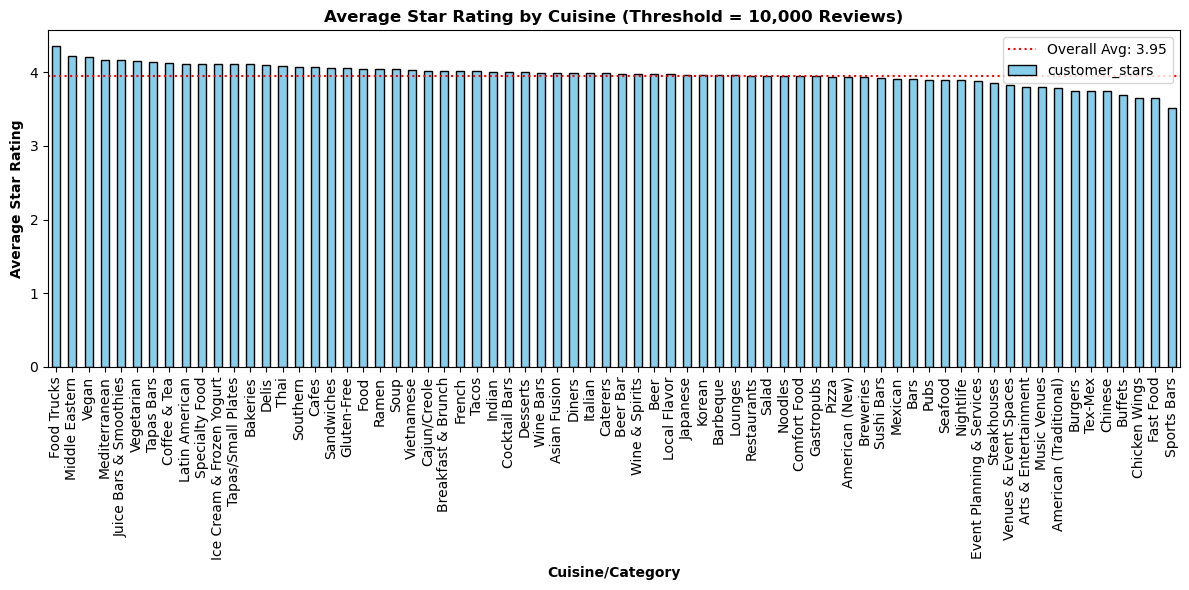

In [38]:
import matplotlib.pyplot as plt

filtered_df = filtered_reviews_for_graph.dropna(subset=['categories', 'customer_stars'])

filtered_df['categories_split'] = filtered_df['categories'].str.split(',')
exploded_df = filtered_df.explode('categories_split')

exploded_df['categories_split'] = exploded_df['categories_split'].str.strip()

average_stars_per_cuisine = exploded_df.groupby('categories_split')['customer_stars'].mean()

review_counts_per_cuisine = exploded_df['categories_split'].value_counts()

filtered_average_stars = average_stars_per_cuisine[review_counts_per_cuisine >= 10000]

plt.figure(figsize=(12, 6))
filtered_average_stars.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Star Rating by Cuisine (Threshold = 10,000 Reviews)', fontweight='bold')
plt.xlabel('Cuisine/Category', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')

overall_average_rating = 3.95
plt.axhline(y=overall_average_rating, color='red', linestyle='dotted', linewidth=1.5, label=f'Overall Avg: {overall_average_rating}')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart shows the average star rating for each cuisine category, filtered to include categories with at least 10,000 reviews. A red dotted line is drawn across the plot to represent the overall average star rating of 3.95. The plot provides a clear way to compare how different cuisines or categories perform relative to the overall average.

Most of the categories cluster closely around the overall average of 3.95, suggesting that customer satisfaction is relatively consistent across popular categories. However, there is some variation, with a few categories slightly exceeding or falling below this benchmark. Specific cuisines like "Food Trucks," "Middle Eastern," and "Vegan" appear to perform well above the average, indicating strong customer satisfaction in these categories. In contrast, categories like "Sports Bars," "Fast Food," and "Chicken Wings" fall below the average, which may reflect customer dissatisfaction or challenges with maintaining quality in these types of establishments.

The chart also highlights an interesting observation about the dataset itself: many of the listed categories are not strictly cuisines. Categories like "Nightlife," "Event Planning & Services," and "Venues & Event Spaces" are more about activities or services than food, which introduces noise into the analysis. These broad or ambiguous labels dilute the focus on actual cuisines and might require further refinement or filtering for more meaningful insights. Overall, the chart suggests that while many cuisines are rated similarly, certain categories stand out for either exceptional or subpar customer satisfaction, and some entries in the dataset could benefit from better categorization.

In [21]:
review_counts_per_cuisine = exploded_df['categories_split'].value_counts()

average_stars_per_cuisine = exploded_df.groupby('categories_split')['customer_stars'].mean()

unique_business_ids_per_cuisine = exploded_df.groupby('categories_split')['business_id'].nunique()

cuisine_stats = pd.DataFrame({
    'average_stars': average_stars_per_cuisine,
    'review_count': review_counts_per_cuisine,
    'unique_business_ids': unique_business_ids_per_cuisine
})

top_5_cuisines = cuisine_stats.sort_values(by='average_stars', ascending=False).head(5)

bottom_5_cuisines = cuisine_stats.sort_values(by='average_stars', ascending=True).head(5)

print("Top 5 Highest Star Rating Cuisines (with review counts and unique business IDs):")
print(top_5_cuisines)

print("\nBottom 5 Lowest Star Rating Cuisines (with review counts and unique business IDs):")
print(bottom_5_cuisines)

Top 5 Highest Star Rating Cuisines (with review counts and unique business IDs):
                        average_stars  review_count  unique_business_ids
categories_split                                                        
Hardware Stores              4.916667            36                    1
Food Tours                   4.907407           108                    1
Somali                       4.840000            25                    1
Newspapers & Magazines       4.833333           720                    1
Airports                     4.833333           720                    1

Bottom 5 Lowest Star Rating Cuisines (with review counts and unique business IDs):
                  average_stars  review_count  unique_business_ids
categories_split                                                  
Day Spas               2.000000           231                    1
Pool & Billiards       2.367925           106                    1
Haitian                2.421053            19           

In [24]:
review_counts_per_cuisine = exploded_df['categories_split'].value_counts()

average_stars_per_cuisine = exploded_df.groupby('categories_split')['customer_stars'].mean()

unique_business_ids_per_cuisine = exploded_df.groupby('categories_split')['business_id'].nunique()

cuisine_stats = pd.DataFrame({
    'average_stars': average_stars_per_cuisine,
    'review_count': review_counts_per_cuisine,
    'unique_business_ids': unique_business_ids_per_cuisine
})

cuisine_stats_filtered = cuisine_stats[cuisine_stats['unique_business_ids'] >= 10]

top_5_cuisines = cuisine_stats_filtered.sort_values(by='average_stars', ascending=False).head(5)

bottom_5_cuisines = cuisine_stats_filtered.sort_values(by='average_stars', ascending=True).head(5)

print("Top 5 Highest Star Rating Cuisines (with review counts and unique business IDs):")
print(top_5_cuisines)

print("\nBottom 5 Lowest Star Rating Cuisines (with review counts and unique business IDs):")
print(bottom_5_cuisines)

Top 5 Highest Star Rating Cuisines (with review counts and unique business IDs):
                  average_stars  review_count  unique_business_ids
categories_split                                                  
Ethiopian              4.494170          1801                   15
Flowers & Gifts        4.493145          2480                   15
Farmers Market         4.371622          1184                   14
Food Trucks            4.350544         16269                  200
Venezuelan             4.348837          1849                   12

Bottom 5 Lowest Star Rating Cuisines (with review counts and unique business IDs):
                  average_stars  review_count  unique_business_ids
categories_split                                                  
Pool Halls             2.940171           702                   10
Arcades                3.096357          2086                   25
Dance Clubs            3.302010          1841                   23
Eatertainment          3.330640

These results highlight significant contrasts between the highest and lowest-rated cuisines or categories, providing insights into customer satisfaction and engagement within the dataset. The top-rated categories, such as Ethiopian and Venezuelan, achieve exceptionally high average star ratings (above 4.3) while having relatively modest review counts and a small number of unique businesses. This suggests that these cuisines are niche or less widespread, but the businesses that do exist within these categories are highly appreciated for their quality or uniqueness. For example, Food Trucks, with a much higher review count (16,269) and a larger number of unique businesses (200), still maintains a strong average rating, indicating both popularity and consistent customer satisfaction across a broader scale. The inclusion of non-cuisine categories like Flowers & Gifts and Farmers Market in the top ratings reflects some overlap in the dataset between food-related and non-food-related businesses, which may need refinement for more targeted analysis.

On the other hand, the lowest-rated categories, such as Pool Halls, Arcades, and Dance Clubs, reflect less favorable customer experiences, with average ratings below 3.5. These categories, like Eatertainment and Bowling, are not strictly cuisines but represent entertainment-focused services. The lower ratings may stem from the challenges of managing customer expectations in recreational settings, where factors like atmosphere, wait times, or service quality can significantly impact satisfaction. Additionally, these categories generally have higher review counts and larger numbers of unique businesses compared to the top-rated categories, suggesting that they cater to broader audiences but face more scrutiny and diverse opinions.

Overall, the analysis reveals a divide between niche, highly appreciated categories (like Ethiopian and Venezuelan) and broad, service-oriented categories (like Pool Halls and Arcades) that struggle with maintaining consistent satisfaction. This also highlights the complexity of analyzing mixed datasets containing both food-related and entertainment-focused categories.

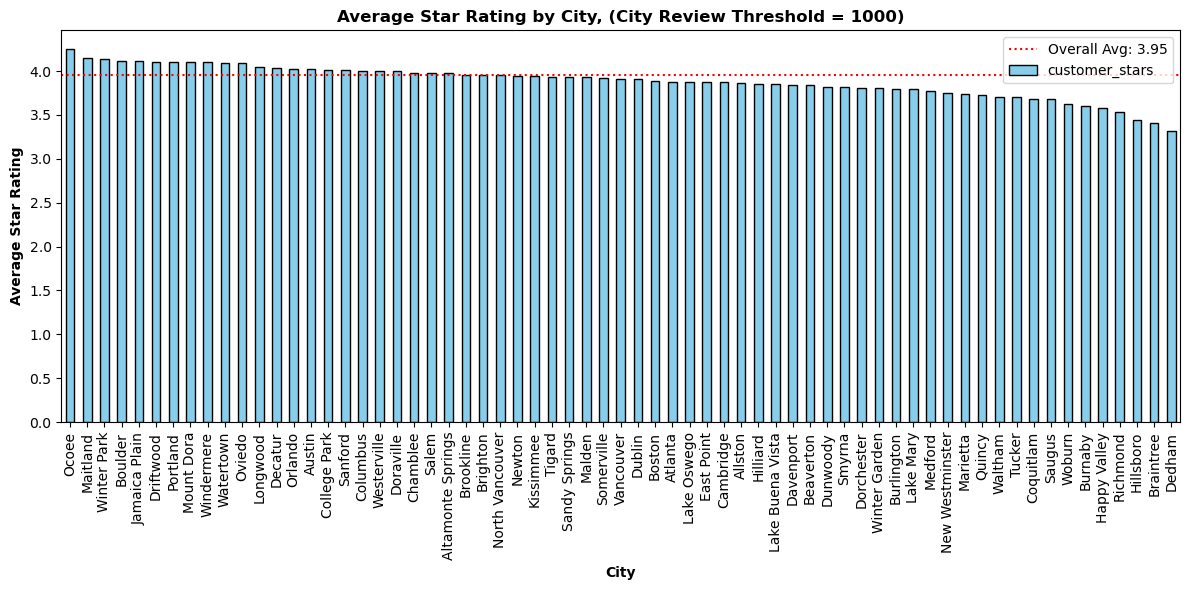

In [39]:
import matplotlib.pyplot as plt

filtered_df = filtered_reviews_for_graph.dropna(subset=['city', 'customer_stars'])

average_stars_per_city = filtered_df.groupby('city')['customer_stars'].mean()

city_review_counts = filtered_df['city'].value_counts()

filtered_average_stars = average_stars_per_city[city_review_counts >= 1000]

plt.figure(figsize=(12, 6))
filtered_average_stars.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Star Rating by City, (City Review Threshold = 1000)', fontweight='bold')
plt.xlabel('City', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')

overall_average_rating = 3.95
plt.axhline(y=overall_average_rating, color='red', linestyle='dotted', linewidth=1.5, label=f'Overall Avg: {overall_average_rating}')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This chart shows the average star rating for cities with at least 1,000 reviews, accompanied by a red dotted line representing the overall average star rating of 3.95. At first glance, the data doesn’t present a significant variation in ratings across the cities, as most cities cluster very close to the overall average. This uniformity suggests that customer satisfaction, as measured by star ratings, remains consistent regardless of location for cities meeting the review threshold.

The absence of standout cities either significantly above or below the average makes it difficult to draw meaningful conclusions about how specific cities influence ratings. The overall similarity could be reflective of homogenized experiences across businesses in these cities, potentially driven by standardization in services, expectations, or the way ratings are given.

While this uniformity might not provide deep insights, it does confirm that no city appears to have an overwhelmingly positive or negative bias in customer satisfaction relative to others. Further analysis could focus on digging deeper into specific business types or cuisines within these cities to see if variations exist at a more granular level. Without such additional breakdowns, this chart alone doesn’t provide much actionable information or notable trends.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = filtered_reviews_for_graph.dropna(subset=['city', 'customer_stars'])

average_stars_per_city = filtered_df.groupby('city')['customer_stars'].mean()

review_counts_per_city = filtered_df['city'].value_counts()

unique_business_ids_per_city = filtered_df.groupby('city')['business_id'].nunique()

city_stats = pd.DataFrame({
    'average_stars': average_stars_per_city,
    'review_count': review_counts_per_city,
    'unique_business_ids': unique_business_ids_per_city
})

top_5_cities = city_stats.sort_values(by='average_stars', ascending=False).head(5)
bottom_5_cities = city_stats.sort_values(by='average_stars', ascending=True).head(5)

print("Top 5 Cities by Average Stars (with Review Counts and Unique Business IDs):")
print(top_5_cities)

print("\nBottom 5 Cities by Average Stars (with Review Counts and Unique Business IDs):")
print(bottom_5_cities)

print("\nUnique Business IDs and Names in Top 5 Cities:")
for city in top_5_cities.index:
    city_businesses = filtered_df[filtered_df['city'] == city][['business_id', 'name']].drop_duplicates()
    print(f"\n{city}:")
    print(city_businesses.to_string(index=False))

print("\nUnique Business IDs and Names in Bottom 5 Cities:")
for city in bottom_5_cities.index:
    city_businesses = filtered_df[filtered_df['city'] == city][['business_id', 'name']].drop_duplicates()
    print(f"\n{city}:")
    print(city_businesses.to_string(index=False))

Top 5 Cities by Average Stars (with Review Counts and Unique Business IDs):
                 average_stars  review_count  unique_business_ids
city                                                             
Union Park            4.806452            31                    1
Carroll               4.692308            13                    1
Bay Lake              4.666667             9                    1
Brice                 4.642857            28                    1
College Park Ga       4.619048            42                    1

Bottom 5 Cities by Average Stars (with Review Counts and Unique Business IDs):
                average_stars  review_count  unique_business_ids
city                                                            
PORTLAND             2.096154            52                    1
ORLANDO              2.591549            71                    2
Everett              2.627986           293                    5
Stone Mountain       2.634921            63              

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = filtered_reviews_for_graph.dropna(subset=['city', 'customer_stars'])

average_stars_per_city = filtered_df.groupby('city')['customer_stars'].mean()

review_counts_per_city = filtered_df['city'].value_counts()

unique_business_ids_per_city = filtered_df.groupby('city')['business_id'].nunique()

city_stats = pd.DataFrame({
    'average_stars': average_stars_per_city,
    'review_count': review_counts_per_city,
    'unique_business_ids': unique_business_ids_per_city
})

city_stats_filtered = city_stats[city_stats['unique_business_ids'] >= 10]

top_5_cities = city_stats_filtered.sort_values(by='average_stars', ascending=False).head(5)
bottom_5_cities = city_stats_filtered.sort_values(by='average_stars', ascending=True).head(5)

print("Top 5 Cities by Average Stars (with Review Counts and Unique Business IDs):")
print(top_5_cities)

print("\nBottom 5 Cities by Average Stars (with Review Counts and Unique Business IDs):")
print(bottom_5_cities)

print("\nUnique Business IDs and Names in Top 5 Cities:")
for city in top_5_cities.index:
    city_businesses = filtered_df[filtered_df['city'] == city][['business_id', 'name']].drop_duplicates()
    print(f"\n{city}:")
    print(city_businesses.to_string(index=False))

print("\nUnique Business IDs and Names in Bottom 5 Cities:")
for city in bottom_5_cities.index:
    city_businesses = filtered_df[filtered_df['city'] == city][['business_id', 'name']].drop_duplicates()
    print(f"\n{city}:")
    print(city_businesses.to_string(index=False))

Top 5 Cities by Average Stars (with Review Counts and Unique Business IDs):
                average_stars  review_count  unique_business_ids
city                                                            
Winter Springs       4.295014           722                   10
Ocoee                4.251984          1008                   14
Worthington          4.222061           689                   12
Maitland             4.144928          1104                   15
Winter Park          4.135987         11707                  102

Bottom 5 Cities by Average Stars (with Review Counts and Unique Business IDs):
           average_stars  review_count  unique_business_ids
city                                                       
Dedham          3.315126          1190                   16
Bee Cave        3.375212           589                   10
Braintree       3.407666          1722                   20
Clackamas       3.425557           853                   13
Hillsboro       3.444103     

The data shows a pretty clear difference between the top 5 and bottom 5 cities by average star ratings. In the top-rated group, Winter Springs takes the lead with an impressive average of 4.30, although it’s based on only 722 reviews and 10 businesses, which isn’t a lot. Ocoee, Worthington, and Maitland all follow with ratings above 4.1, and they also have smaller numbers of reviews and businesses. What’s interesting is Winter Park—it’s slightly lower at 4.14 but has a huge number of reviews (11,707!) and 102 businesses. That makes it stand out as a city where not only do people seem happy with their experiences, but there’s also a much bigger and more active business scene.

On the flip side, the bottom-rated cities all hover between 3.31 and 3.44, which is noticeably below the overall average of 3.95. Dedham and Bee Cave have fewer reviews and businesses, so their lower ratings might be tied to just a handful of places dragging the averages down. Meanwhile, cities like Braintree and Hillsboro have more reviews and businesses, which suggests a more widespread issue with customer satisfaction. Clackamas falls somewhere in between—it’s not as small as Dedham but also doesn’t have the larger numbers of Braintree or Hillsboro.

All in all, smaller cities like Winter Springs or Dedham seem to have more extreme ratings, either really high or really low, probably because a few businesses can have a big impact. Bigger cities like Winter Park or Hillsboro show how larger numbers of businesses and reviews can either maintain consistent quality (like Winter Park) or highlight more widespread dissatisfaction (like Hillsboro). It’s a good reminder that size and diversity can play a big role in shaping these kinds of averages.

In [27]:
import networkx as nx

degree_centrality = nx.degree_centrality(G)

top_5_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Nodes by Degree Centrality with Additional Information:")
for i, (node, centrality) in enumerate(top_5_central, start=1):
    node_info = filtered_reviews_for_graph[filtered_reviews_for_graph['business_id'] == node][['name', 'city', 'address']].drop_duplicates()
    if not node_info.empty:
        name = node_info['name'].iloc[0]
        city = node_info['city'].iloc[0]
        address = node_info['address'].iloc[0]
    else:
        name = city = address = "Unknown"
    
    print(f"{i}. Node: {node}, Degree Centrality: {centrality:.4f}, Name: {name}, City: {city}, Address: {address}")

Top 5 Nodes by Degree Centrality with Additional Information:
1. Node: PrsvO1rzkgg6qFizlAoEtg, Degree Centrality: 0.0052, Name: Mike's Pastry, City: Boston, Address: 300 Hanover St
2. Node: 0oGCF9xsvKe1vS6Sm3o3VQ, Degree Centrality: 0.0047, Name: Kokoro Tokyo Mazesoba, City: Vancouver, Address: 551 Seymour Street
3. Node: YZs1gNSh_sN8JmN_nrpxeA, Degree Centrality: 0.0042, Name: Terry Black's Barbecue, City: Austin, Address: 1003 Barton Springs Rd
4. Node: z9oCxeqOKp2QMfM24m7bUw, Degree Centrality: 0.0040, Name: Mary Mac's Tea Room, City: Atlanta, Address: 224 Ponce De Leon Ave NE
5. Node: gjYyUYpTeNMp8zrw4ZDYCw, Degree Centrality: 0.0038, Name: Bulla Gastrobar, City: Winter Park, Address: 110 S Orlando Ave, Ste 7


In [28]:
import networkx as nx

betweenness_centrality = nx.betweenness_centrality(G)

top_5_central = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Nodes by Betweenness Centrality with Additional Information:")
for i, (node, centrality) in enumerate(top_5_central, start=1):
    node_info = filtered_reviews_for_graph[filtered_reviews_for_graph['business_id'] == node][['name', 'city', 'address']].drop_duplicates()
    if not node_info.empty:
        name = node_info['name'].iloc[0]
        city = node_info['city'].iloc[0]
        address = node_info['address'].iloc[0]
    else:
        name = city = address = "Unknown"
    
    print(f"{i}. Node: {node}, Betweenness Centrality: {centrality:.4f}, Name: {name}, City: {city}, Address: {address}")

Top 5 Nodes by Betweenness Centrality with Additional Information:
1. Node: AKy2zm65mK5bti9kOCNVBA, Betweenness Centrality: 0.4602, Name: Red Phone Booth, City: Atlanta, Address: 17 Andrew Young International Blvd NE
2. Node: wVlxPWwFL-MrzCXim-UfWg, Betweenness Centrality: 0.4599, Name: Bambolina Restaurant, City: Salem, Address: 288 Derby St
3. Node: iGK--9XyrPwVNQOvP_EFgQ, Betweenness Centrality: 0.4452, Name: Tamsung Thai Street Eats, City: Atlanta, Address: 3226 Roswell Rd NW
4. Node: skJ7MuoT1YZq1WfILiCtwA, Betweenness Centrality: 0.4411, Name: Atlanta Fish Market, City: Atlanta, Address: 265 Pharr Rd NE
5. Node: wZn9tnC6NC0wgIllBnrICg, Betweenness Centrality: 0.4401, Name: Howell's Kitchen and Bar, City: Atlanta, Address: 1962 Howell Mill Rd, Ste 100


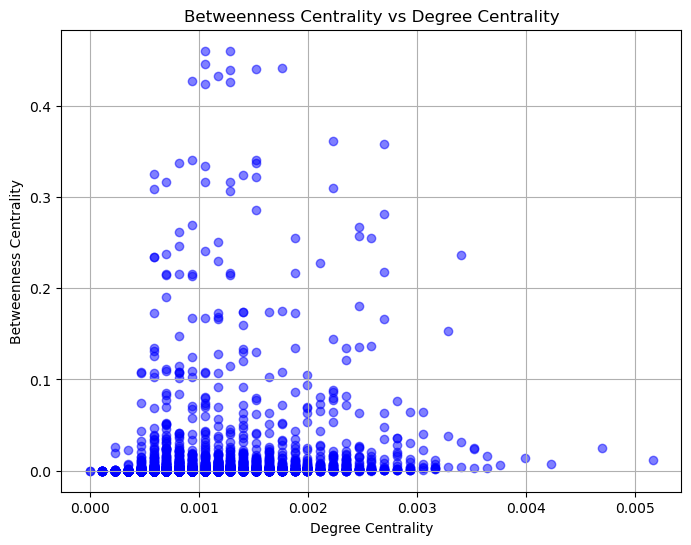

In [29]:
degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality.values())

plt.figure(figsize=(8, 6))
plt.scatter(degree_values, betweenness_values, alpha=0.5, c='blue')
plt.title('Betweenness Centrality vs Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()

The degree centrality and betweenness centrality scores offer different perspectives on the importance and influence of nodes in the network. The top nodes by degree centrality highlight businesses that are highly connected within the network, meaning they directly interact with a large number of other nodes. For example, Mike's Pastry in Boston has the highest degree centrality (0.0052), followed closely by businesses like Kokoro Tokyo Mazesoba in Vancouver and Terry Black's Barbecue in Austin. These businesses likely appear in many connections because they are popular or frequently visited, making them central hubs of activity. However, their relatively low degree centrality values suggest that even the most connected nodes only represent a small portion of the total network, indicating a large, diverse dataset with many nodes.

On the other hand, the top nodes by betweenness centrality reflect businesses that play a critical role in connecting different parts of the network. These nodes act as bridges, facilitating interaction or information flow between otherwise disconnected groups. For instance, Red Phone Booth in Atlanta has the highest betweenness centrality score (0.4602), followed by other Atlanta-based businesses like Tamsung Thai Street Eats and Atlanta Fish Market. This strong presence of Atlanta-based businesses in the top betweenness scores suggests that Atlanta may serve as a significant hub or linking region in the dataset, connecting various clusters or communities. Unlike degree centrality, betweenness centrality doesn't measure how many direct connections a node has but rather how important it is in the overall network structure.

The two metrics together show that while businesses like Mike's Pastry and Terry Black's Barbecue are central because of their high number of direct connections, others like Red Phone Booth and Atlanta Fish Market are crucial for their role in linking different parts of the network. This distinction underscores how some businesses gain prominence through popularity, while others influence the network by bridging gaps between communities.

The scatter plot compares betweenness centrality and degree centrality for nodes in the network, revealing some key insights about their relationship. The distribution shows that while there is a general clustering of nodes with low values for both metrics, there are also outliers with significantly higher betweenness centrality, even when their degree centrality remains relatively low.

Most nodes are concentrated near the bottom left of the plot, where both degree and betweenness centralities are close to zero. These nodes likely represent businesses with limited connections and minimal influence in bridging different parts of the network. They are peripheral in nature, with neither many direct connections nor an important role in linking different clusters.

The more interesting part of the plot lies in the nodes with high betweenness centrality but comparatively lower degree centrality. These nodes act as critical bridges in the network, connecting otherwise disconnected parts, despite not having many direct links themselves. This behavior is typical for nodes that play a structural role in maintaining network cohesion. Conversely, nodes with high degree centrality but low betweenness centrality are likely hubs connected to many other nodes but not positioned in a way that significantly influences the flow between network clusters.

The lack of a strong correlation between the two metrics suggests that being well-connected (high degree centrality) does not necessarily make a node structurally important in the overall network (high betweenness centrality). This highlights the distinct roles these metrics play in understanding the influence and importance of nodes within a network.

In [31]:
degree_assortativity = nx.degree_assortativity_coefficient(G)

print(f"Degree Assortativity Coefficient: {degree_assortativity:.4f}")

Degree Assortativity Coefficient: 0.2010


in our network a link between two restaurants exists when a user has reviewed both. This means that the degree assortativity coefficient of 0.2010 takes on a specific interpretation. A positive assortativity in this context means that restaurants with similar levels of user overlap are slightly more likely to be connected.

For example, popular restaurants with high degrees (those reviewed by many users who also review other restaurants) are more likely to be connected to other similarly popular restaurants. This could reflect shared customer bases for well-known or high-profile dining spots that attract active reviewers. For instance, users who frequently review upscale or trendy restaurants might visit and review multiple such restaurants, creating a cluster of highly connected nodes.

Similarly, less-connected restaurants—those with fewer overlapping reviewers—are more likely to be linked to other low-degree restaurants. These might represent smaller, more niche establishments with localized or specific audiences that don't frequently venture into larger networks of dining options.

This moderate positive assortativity suggests some level of clustering based on shared customer behavior: popular restaurants tend to be indirectly connected through active reviewers, while niche restaurants are more isolated and connected within their own smaller communities. However, the value of 0.2010 indicates that this effect is not particularly strong, meaning there is still significant mixing between restaurants of different degrees. For example, a highly connected restaurant may occasionally share a reviewer with a smaller, niche spot, bridging the gap between the two clusters. This balance reflects the diversity in user behavior, where some users stick to specific types of restaurants, while others explore a wide range of dining options.

Calculating NC score...
100%|███████████████████████████████████████| 2000/2000 [16:09<00:00,  2.06it/s]


BarnesHut Approximation  took  288.92  seconds
Repulsion forces  took  648.96  seconds
Gravitational forces  took  0.56  seconds
Attraction forces  took  2.51  seconds
AdjustSpeedAndApplyForces step  took  11.14  seconds


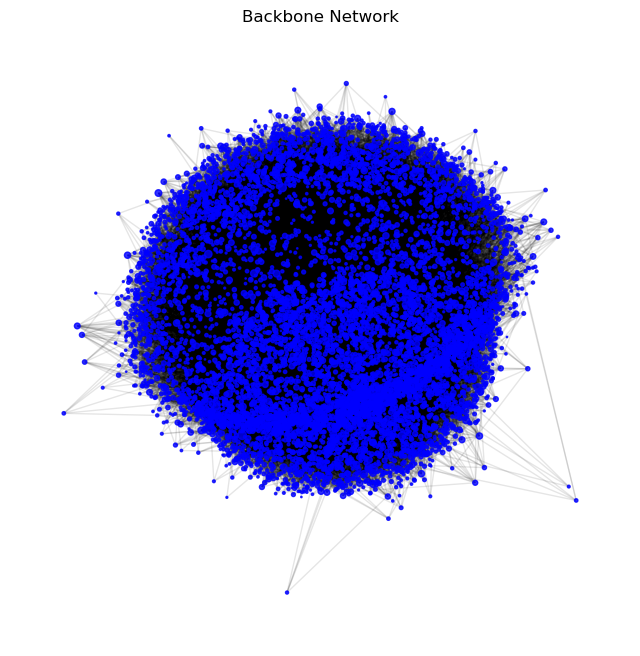

In [32]:
'''
import networkx as nx
import numpy as np
import backboning
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt

edge_betweenness = nx.edge_betweenness_centrality(G)

min_betweenness = min(edge_betweenness.values())
max_betweenness = max(edge_betweenness.values())

G_weighted = G.copy()

for u, v in G_weighted.edges():
    normalized_weight = 1 + 99 * (edge_betweenness[(u, v)] - min_betweenness) / (max_betweenness - min_betweenness)
    G_weighted[u][v]['weight'] = normalized_weight


edge_list = pd.DataFrame([(u, v, d['weight']) for u, v, d in G_weighted.edges(data=True)],
                         columns=['src', 'trg', 'weight'])

edge_list.to_csv("weight.csv", index=False)

table, nnodes, nnedges = backboning.read("weight.csv", "weight", sep=',', undirected=True)

nc_table = backboning.noise_corrected(table)

threshold_value = 0.1
nc_backbone = backboning.thresholding(nc_table, threshold_value)

backboning.write(nc_backbone, "cm-backbone", "nc", "./")

backbone = pd.read_csv("cm-backbone_nc.csv", sep="\t")

G_backbone = nx.from_pandas_edgelist(backbone, 'src', 'trg', ['score'])

node_degree = dict(G_backbone.degree())

forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=20.0,
    strongGravityMode=True,
    gravity=20.0,
    verbose=True
)

positions = forceatlas2.forceatlas2_networkx_layout(G_backbone, iterations=2000)

plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(
    G_backbone, positions,
    node_size=[node_degree[node] * 1 for node in G_backbone.nodes()],
    node_color='blue',
    alpha=0.8
)

nx.draw_networkx_edges(
    G_backbone, positions, 
    width=[G_backbone[u][v]['score'] for u, v in G_backbone.edges()],
    edge_color='black',
    alpha=0.1
)

plt.axis('off')
plt.title("Backbone Network")
plt.show()
'''

In [ ]:
import networkx as nx
import numpy as np
import backboning
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt

edge_betweenness = nx.edge_betweenness_centrality(G)

min_betweenness = min(edge_betweenness.values())
max_betweenness = max(edge_betweenness.values())

G_weighted = G.copy()

for u, v in G_weighted.edges():
    normalized_weight = 1 + 99 * (edge_betweenness[(u, v)] - min_betweenness) / (max_betweenness - min_betweenness)
    G_weighted[u][v]['weight'] = normalized_weight


edge_list = pd.DataFrame([(u, v, d['weight']) for u, v, d in G_weighted.edges(data=True)],
                         columns=['src', 'trg', 'weight'])

edge_list.to_csv("weight.csv", index=False)

table, nnodes, nnedges = backboning.read("weight.csv", "weight", sep=',', undirected=True)

nc_table = backboning.noise_corrected(table)

threshold_value = 0.1
nc_backbone = backboning.thresholding(nc_table, threshold_value)

backboning.write(nc_backbone, "cm-backbone", "nc", "./")

100%|███████████████████████████████████████| 2000/2000 [18:09<00:00,  1.84it/s]


BarnesHut Approximation  took  323.72  seconds
Repulsion forces  took  726.95  seconds
Gravitational forces  took  1.19  seconds
Attraction forces  took  3.22  seconds
AdjustSpeedAndApplyForces step  took  13.83  seconds


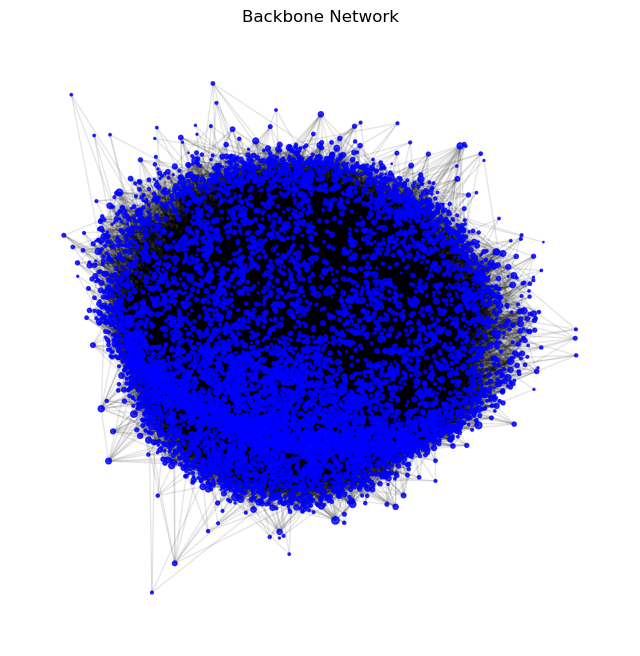

In [33]:
import networkx as nx
import numpy as np
import backboning
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt


backbone = pd.read_csv("cm-backbone_nc.csv", sep="\t")

G_backbone = nx.from_pandas_edgelist(backbone, 'src', 'trg', ['score'])

node_degree = dict(G_backbone.degree())

forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=20.0,
    strongGravityMode=True,
    gravity=20.0,
    verbose=True
)

positions = forceatlas2.forceatlas2_networkx_layout(G_backbone, iterations=2000)

plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(
    G_backbone, positions,
    node_size=[node_degree[node] * 1 for node in G_backbone.nodes()],
    node_color='blue',
    alpha=0.8
)

nx.draw_networkx_edges(
    G_backbone, positions, 
    width=[G_backbone[u][v]['score'] for u, v in G_backbone.edges()],
    edge_color='black',
    alpha=0.1
)

plt.axis('off')
plt.title("Backbone Network")
plt.show()

This visualization of the restaurant network shows a structure that appears more hollow overall, with the bottom and top regions being noticeably denser than the rest. Unlike what one might expect from a tightly connected central cluster, the network's core is sparse, with only the lower portion displaying greater node and edge density. 

The hollow center and dense regions highlight a degree of community structure. Instead of one large, interconnected network, the restaurants are organized into clusters, with strong connections within specific groups (bottom and top regions) and weaker connections between them. This can reflect the behavior of users who tend to review restaurants within similar categories or locations, leading to localized density rather than a fully integrated network.